# Aplicação SVD

Este exercício tem como objetivo mostrar uma aplicação direta de SVD (Decomposição de Valor Singular). 

## Armazenamento de imagens
O processo é tradicionalmente usado para armazenar imagens, economizando espaço. 

A maneira trivial de armazenar uma imagem colorida de resolução $m \times n$ seria armazenar a cor (RGB) de cada pixel, levando a uma matriz $m \times n \times 3$. No caso de imagens em preto e branco, a imagem seria armazenada como uma matriz $m \times n \times 1$. De qualquer maneira, ocuparia um espaço grande.

Na teoria, percebeu-se que pode-se reduzir o tamanho dos dados utilizando-se apenas os primeiros $k$ valores singulares para armazenamento. O que acontece se reduzirmos os dados de uma figura para alguns valores $k$?

Este é um exemplo tradicional, como pode ser visto em [exemplo 01](https://share.cocalc.com/share/c4479738-dfeb-4b2d-8d16-367881a21457/SVD%20of%20a%20picture.ipynb?viewer=share), [exemplo 02](https://www.frankcleary.com/svdimage/) ou [exemplo 03](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition//).



In [0]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import numpy as np

# Upload o file "Tiger.jpg" (ou qualquer outra imagem que você quiser)
uploaded = files.upload()

Saving Tiger.jpg to Tiger.jpg


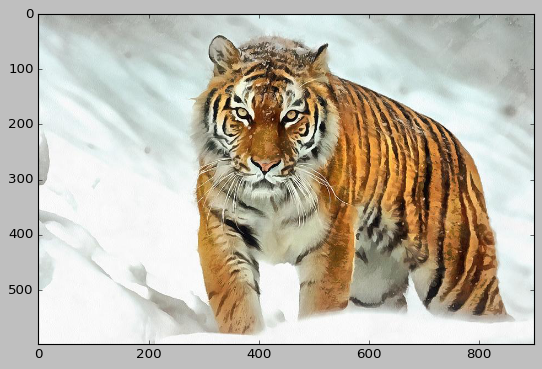

In [0]:
plt.style.use('classic')
#
# Escolohe a imagem para trabalhar
#
img = Image.open('Tiger.jpg')
plt.imshow(img)

## Converte imagem para branco-preto

LA quer dizer: L (pixels de 8-bit, branco-preto) com ALPHA (transparência)

$L = R \frac{299}{1000} + G \frac{587}{1000} + B \frac{114}{100} $

usando a técnica ITU-R 601-2 luma transform. Retorna um objeto imagem

(598, 900, 2)
<PIL.Image.Image image mode=LA size=900x598 at 0x7FB8817F5AC8>


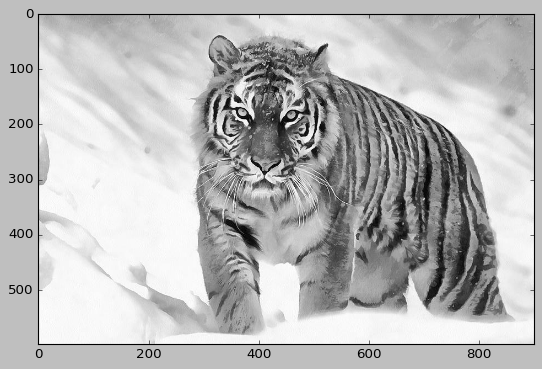

In [0]:
imggray = img.convert('LA')
print(np.shape(imggray))
print(imggray)

plt.imshow(imggray, cmap='gray')

## Converte a imagem para uma array numpy

O comando 

```
imggray.getdata(band=0)
```
retorna o conteúdo de nossa imagem como um objeto sequencial (valores de cada linha) que contém os valores RGB de pixel. 

Como o objeto retornado por este método é um tipo de dado interno da classe PIL, suporta apenas determinadas operações. Para convertê-lo em uma sequência comum, usamos `list(im.getdata(band=0))`.

(538200,)
(598, 900)


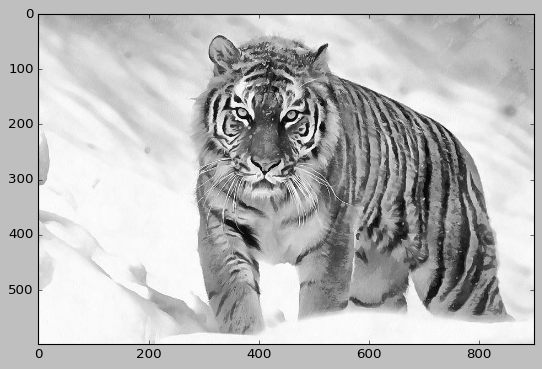

In [0]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
print(np.shape(imgmat))
# Reshape de acordo com as dimensões da imagem original 
imgmat.shape = (imggray.size[1], imggray.size[0])
print(np.shape(imgmat))
# Plotando o resultado para mostrar que os dados não são alterados.
plt.imshow(imgmat, cmap='gray')
plt.show()

# Cálculo de SVD e reconstrução

Os vetores singulares e os valores singulares são ordenados com os primeiros correspondentes à maior variação. Por esse motivo, o uso apenas dos primeiros vetores e valores singulares fornecerá a reconstrução dos principais elementos da imagem.
Vamos decompor a imagem em valor singular,

$A=UDV^T$

e ir reconstruindo (brincando...), $k=1,2,...,n$, até encontrarmos um valor $k$ que reconstrua razoavelmente a imagem.

In [0]:
U, S, V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(S.shape)
print(V.shape)

(598, 900)
(598, 598)
(598,)
(900, 900)


Se nossa imagem $A$ tem dimensão $m \times n$, a matriz à esquerda $U=AA^T$ terá dimensão $m \times m$, a matriz digonal $D$ terá dimensão $m \times n$ e a matriz à direita $V=A^TA$ terá dimensão $n \times n$.

Primeiramente, vamos reconstruir a matriz usando apenas o primeiro valor singular. Isto é, a primeira aproximação da imagem será usando somente a primeira coluna de $U$, ié, $u$ de dimensão $m \times 1$, o primeiro termo da matriz diagonal $D$, e a primeira linha de $V$, $v'$ de dimensão $1 \times n$:

${u}_{m \times 1} \cdot d_{11} \cdot {v'}_{1 \times n}=A_{m \times n}$

Essa figura  reproduz o recurso mais proeminente da imagem, a área clara nas laterais e a área escura na parte central. A presença do tigre na neve causa uma escuridão extra no meio da reconstrução. Cada coluna de pixels nesta imagem tem uma ponderação diferente dos valores, $u$.

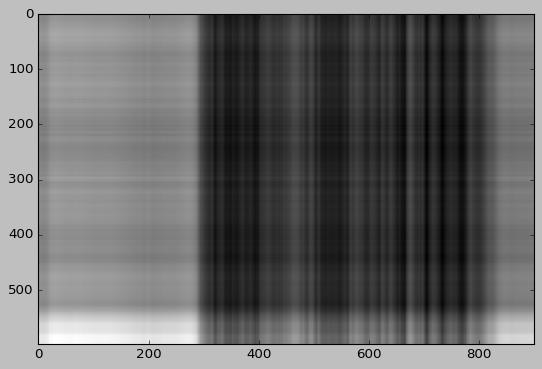

In [0]:
reconstimg = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

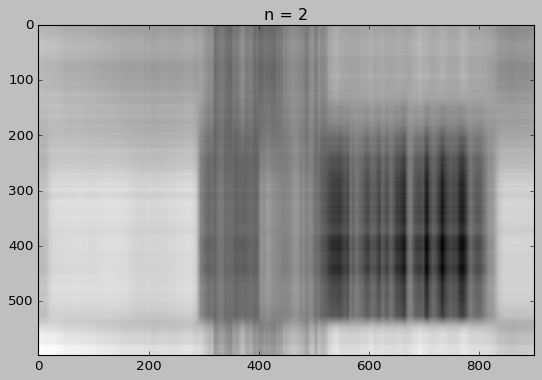

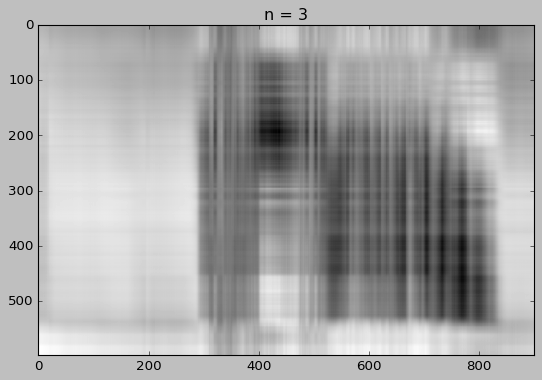

In [0]:
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

O loop abaixo mostra a imagem reconstruída usando os primeiros $n=5,10,15,20,...,50$ vetores da decomposição do valor singular. Os primeiros 50 vetores produzem uma imagem muito próxima da imagem original, ocupando apenas 50 × 3900 + 50 + 50 × 26003900 × 2600 × 3,2% mais espaço que os dados originais.

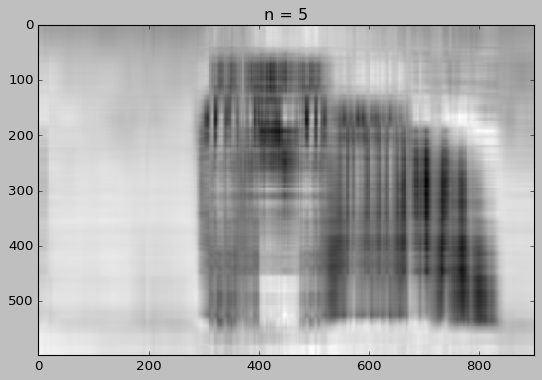

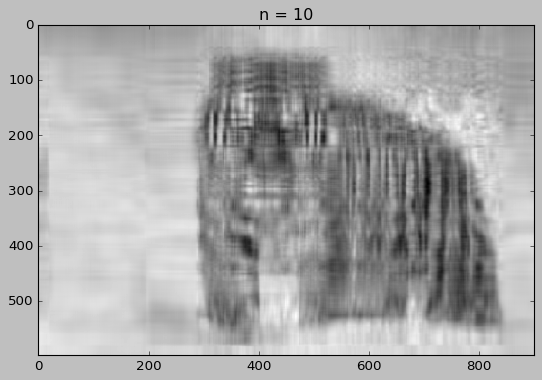

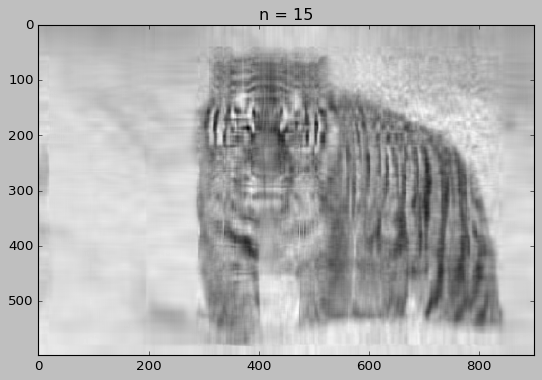

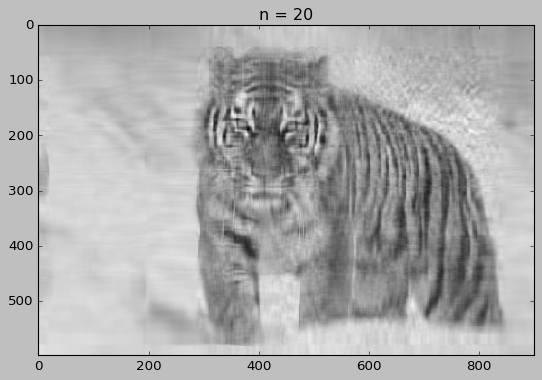

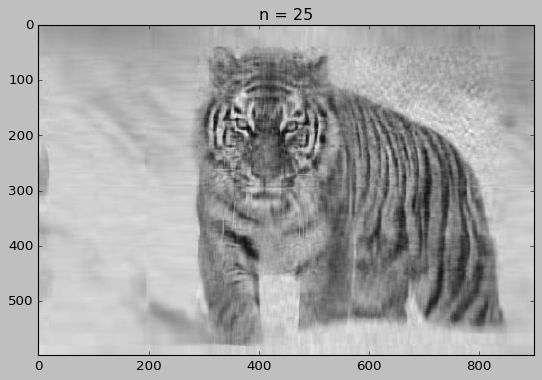

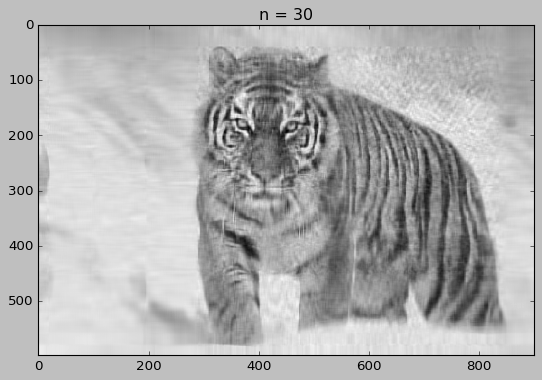

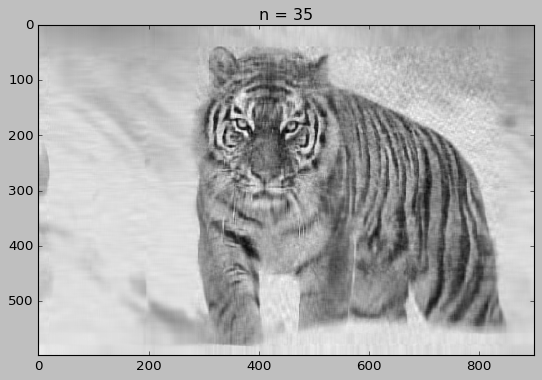

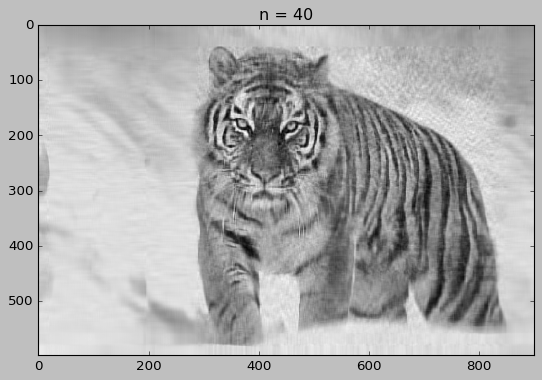

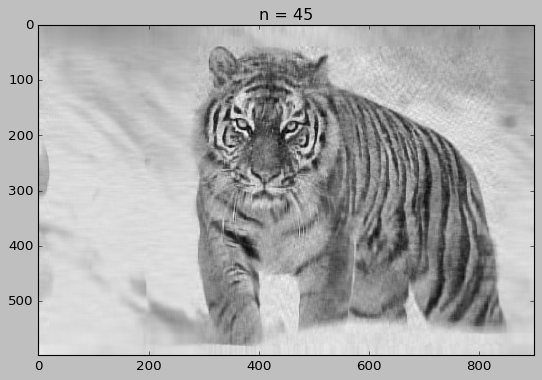

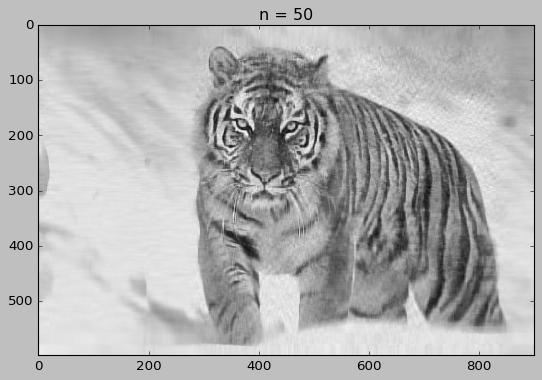

In [0]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

# Análise de desempenho de nossa economia de espaço


In [0]:
print("Temos %d valores singulares, que correspondem à dimensão da matriz S." % S.shape)
print("Dimensão da matriz U: ", U.shape) 
print("Dimensão da matriz V:", V.shape)


Temos 598 valores singulares, que correspondem à dimensão da matriz S.
Dimensão da matriz U:  (598, 598)
Dimensão da matriz V: (900, 900)


Quantos valores singulares $k$ precisamos armazenar para recuperar a matriz inicial da imagem? Quantos números precisamos armazenar se quisermos reconstruir apenas uma aproximação de rank $k$?

Quantos números você precisa armazenar para a imagem aproximada?
A resposta é: a soma das dimensões $m$ do vetor $u$, $n$ do vetor $V$ e $1$ do valor singular da diagonal; tudo isso multiplicado pelo número $k$ de valores singulares que você considera na sua aproximação.

Quantos números você precisa armazenar para a imagem original? A matriz completa $m \times n$.

In [0]:
#Supondo que estamos satisfeitos com nosso k=50
k=50
dim_U=U.shape[0]
dim_V=V.shape[0]

orig_dim = (dim_U*dim_V) 
print("Para imagem original deve-se armazenar %d números." % orig_dim)

approx_dim = (dim_U+dim_V+1)*k   
print("Para imagem aproximada com %d valores singulares, deve-se armazenar %d números." % (k,approx_dim))

economia= (approx_dim/orig_dim)*100
print("Economizou-se, %f" % economia,'%.')

Para imagem original deve-se armazenar 538200 números.
Para imagem aproximada com 50 valores singulares, deve-se armazenar 74950 números.
Economizou-se, 13.926050 %.


# 1.
   SVD é um processo aplicado numa matriz e tem como característica principal a capacidade de retirar as informações mais relevantes dessa matriz por utilização de métodos de álgebra linear, levando em conta principalmente os autovalores e autovetores. Uma das proriedades mais importantes do SVD é que facilmente podemos escolher a quantidade de fatores que queremos utilizar quando a recomposição da matriz está sendo feita, nesse ponto observa-se uma semelhança a decomposição em séries, como séries de Taylor, que permitem a aproximação de funções de alta complexidade em funções polinomiais de um grau que pode ser escolhido dependendo da necessidade da situação a partir da escolha de quantos termos serão utilizados para essa aproximação.<br><br>
   O PCA é uma das mais efetivas aplicações do SVD, ele permite uma visão mais direta do impacto de cada variável em relação ao target do modelo, isso pode servir como guia para a utilização de diminuição de complexidade do problema, o que acarreta um melhor desempenho em termos de tempo de execução, tanto no treino de modelos quanto no momento em que o modelo entra em produção.


# 2.